In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [78]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [79]:
X_train.shape
# each sample is 32*32 image
# is for rgb channels

(50000, 32, 32, 3)

In [80]:
X_test.shape

(10000, 32, 32, 3)

In [81]:
X_train[0] # we get 3 dim array: 32*32 in 3 rgd channels

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

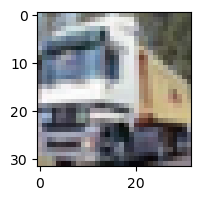

In [82]:
plt.figure(figsize= (15,2))
plt.imshow(X_train[1])

In [83]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [84]:
y_train[0]

array([6], dtype=uint8)

In [85]:
classes[6]

'frog'

In [86]:
y_train = y_train.reshape(-1,) # it changes to 1 dim array, -1 keeps index-1st dim- as is-10000 image, 
                                # 2nd dim, we want to flatten, from 2 to 1 dim: from 6 in array: to simple 6: leave this blank
y_train[0:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [87]:
y_test = y_test.reshape(-1, )

In [88]:
def plot_sample(X,y,index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

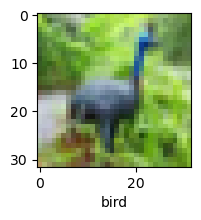

In [89]:
plot_sample(X_train, y_train, 6)

**normlizing image**

In [90]:
X_train = X_train/255
X_test = X_test/255

In [92]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), 
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')    
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=1)   

1563/1563 [==============================] - 149s 86ms/step - loss: 1.8123 - accuracy: 0.3543


In [93]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 22s 22ms/step - loss: 1.7070 - accuracy: 0.4007


[1.7070459127426147, 0.40070000290870667]

we saw the accuracy of ann is bad. 

In [97]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 14s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.57      0.47      1000
           1       0.41      0.60      0.49      1000
           2       0.41      0.06      0.11      1000
           3       0.27      0.51      0.35      1000
           4       0.37      0.42      0.39      1000
           5       0.61      0.08      0.14      1000
           6       0.45      0.43      0.44      1000
           7       0.64      0.22      0.33      1000
           8       0.56      0.54      0.55      1000
           9       0.38      0.58      0.46      1000

    accuracy                           0.40     10000
   macro avg       0.45      0.40      0.37     10000
weighted avg       0.45      0.40      0.37     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

<img src = "CNN.png" />

In [101]:
# convolution detects the feature of an image, you do not say what the filters are: like circle of 9 etc.
# it figures out filters on its own. speciy only how many filter you want-filters, filter size-kernel_size 
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size= (3,3), activation="relu", input_shape= (32,32,3)),                        
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size= (3,3), activation="relu"),                        
    layers.MaxPooling2D((2,2)),
   
    #dense network
    layers.Flatten(), #network will capture shape, no need to specify 
    layers.Dense(1000, activation='relu'), # cnn will do the most job, we dont need so many layers
    layers.Dense(10, activation='softmax') #difference between sigmoid and softmax AF: softmax normalize probability.     
])

In [102]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # because we use categorical y_train, sparse: if we use y_train
              metrics=['accuracy'])

In [103]:
#accuracy increased from .32 to .52
cnn.fit(X_train, y_train, epochs=1)   

1563/1563 [==============================] - 137s 76ms/step - loss: 1.3327 - accuracy: 0.5232


In [104]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 20s 23ms/step - loss: 1.0607 - accuracy: 0.6288


[1.0607000589370728, 0.6287999749183655]

In [105]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

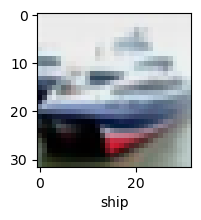

In [106]:
plot_sample(X_test, y_test, 1)

In [107]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 19s 17ms/step


In [109]:
y_pred[:5] #values here are prob dist between 0 and 1-softmax, pick the max prob

array([[2.1049889e-02, 1.1829447e-02, 4.6174597e-02, 6.2000853e-01,
        1.6483030e-03, 2.0496060e-01, 5.2430853e-02, 3.6730119e-03,
        3.3423539e-02, 4.8012794e-03],
       [2.3215305e-02, 2.7744836e-01, 2.0057963e-05, 4.0033260e-06,
        1.5988522e-05, 7.2536477e-07, 3.2640168e-07, 7.7412722e-07,
        6.9307339e-01, 6.2210737e-03],
       [6.4516611e-02, 7.6831721e-02, 2.3893206e-03, 8.3282747e-04,
        9.0176793e-04, 2.2173971e-04, 7.4818636e-05, 1.0269806e-03,
        8.2484376e-01, 2.8360449e-02],
       [5.9138793e-01, 1.4960420e-02, 6.7495927e-03, 4.9616274e-04,
        2.8413741e-03, 5.9725407e-05, 2.1391999e-04, 2.5361872e-04,
        3.8185951e-01, 1.1777445e-03],
       [1.0438068e-03, 4.1559441e-03, 7.1603507e-02, 1.5374169e-01,
        3.7992284e-01, 6.1356243e-02, 3.2274514e-01, 3.2132876e-03,
        1.6724952e-03, 5.4506323e-04]], dtype=float32)

In [110]:
np.argmax(y_pred[0])#it gives the index which is max

3

In [112]:
y_classses= [np.argmax(i) for i in y_pred]

In [121]:
y_classses[:5]

[3, 8, 8, 0, 4]

In [122]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

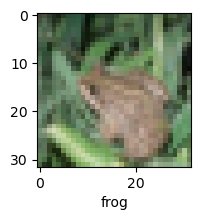

In [125]:
plot_sample(X_test, y_test, 4)

In [126]:
classes[y_classses[4]]

'deer'

In [128]:
print("Classification Report: \n", classification_report(y_test, y_classses))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.66      0.67      1000
           1       0.67      0.80      0.73      1000
           2       0.55      0.46      0.50      1000
           3       0.43      0.45      0.44      1000
           4       0.65      0.42      0.51      1000
           5       0.55      0.56      0.56      1000
           6       0.71      0.73      0.72      1000
           7       0.68      0.71      0.69      1000
           8       0.65      0.84      0.73      1000
           9       0.71      0.65      0.68      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000

